# **ES114 Probability Lab Assignment 10 - Data Narrative**
###&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**By Karan Sagar Gandhi (23110157)**

In this notebook I have done some data exploration and asked 10 non-trivial questions about the dataset. If you intend to run this notebook, then I request you to kindly download the dataset from here: https://data.world/tylerudite/atp-match-data?authuser=4 and upload the files.

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from google.colab import output # To disable scrolling in the cells

## Preparing the dataset

In [ ]:
atp2000 = pd.read_excel('atp_2000.xls')
atp2001 = pd.read_excel('atp_2001.xls')
atp2002 = pd.read_excel('atp_2002.xls')
atp2003 = pd.read_excel('atp_2003.xls')
atp2004 = pd.read_excel('atp_2004.xls')
atp2005 = pd.read_excel('atp_2005.xls')
atp2006 = pd.read_excel('atp_2006.xls')
atp2007 = pd.read_excel('atp_2007.xls')
atp2008 = pd.read_excel('atp_2008.xls')
atp2009 = pd.read_excel('atp_2009.xls')
atp2010 = pd.read_excel('atp_2010.xls')
atp2011 = pd.read_excel('atp_2011.xls')
atp2012 = pd.read_excel('atp_2012.xls')
atp2013 = pd.read_excel('atp_2013.xlsx')
atp2014 = pd.read_excel('atp_2014.xlsx')
atp2015 = pd.read_excel('atp_2015.xlsx')
atp2016 = pd.read_excel('atp_2016.xlsx')
atp2017 = pd.read_excel('atp_2017.xlsx')
atp2018 = pd.read_excel('atp_2018.xlsx')
atp2019 = pd.read_excel('atp_2019.xlsx')
atp2020 = pd.read_excel('atp_2020.xlsx')
atp2021 = pd.read_excel('atp_2021.xlsx')
atp2022 = pd.read_excel('atp_2022.xlsx')
atp2023 = pd.read_excel('atp_2023.xlsx')
atp2024 = pd.read_excel('atp_2024.xlsx')
atpplayers = pd.read_csv('atp_players.csv')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
atp_matches = [
    atp2000,
    atp2001,
    atp2002,
    atp2003,
    atp2004,
    atp2005,
    atp2006,
    atp2007,
    atp2008,
    atp2009,
    atp2010,
    atp2011,
    atp2012,
    atp2013,
    atp2014,
    atp2015,
    atp2016,
    atp2017,
    atp2018,
    atp2019,
    atp2020,
    atp2021,
    atp2022,
    atp2023,
    atp2024,
]

all_data = pd.concat(atp_matches)
all_data.reset_index(inplace = True)
atpplayers['full_name'] = atpplayers['last_name'] + ' ' + atpplayers['first_initial'].astype(str).apply(func=lambda x: '.'.join(x) + '.')
joined = pd.merge(all_data, atpplayers, left_on='Winner', right_on='full_name')

## Question 1

How many of the players are biased towards playing on a particular surface? and if so then which surface? We can say a player is biased if he or she wins more than 50% of the matches on that particular surface. This will only consider players who win more on a given surface.

**Inference**

From the plots which you can see below around 62% of the total number of players are biased on playing on a given surface. And also most of them prefer playing on hard surface courts. This shows a strong biased nature for playing on hard surface courts.

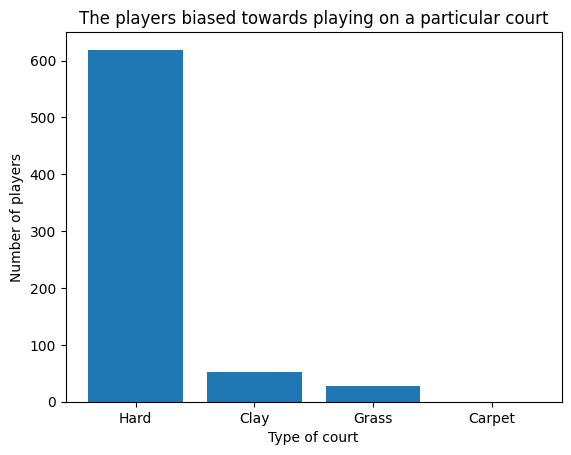

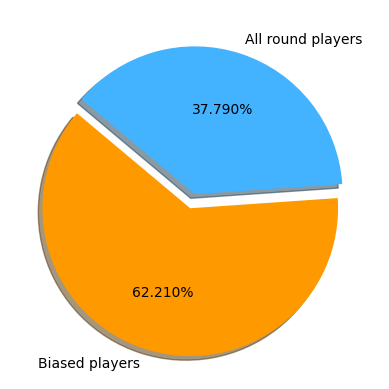

In [ ]:
x = 0.5
grouped_data = all_data.groupby(['Winner', 'Surface'])['Date'].count()
surfaces = list(all_data['Surface'].unique())
data_to_plot = np.zeros(len(surfaces))

prev = ""
biased = 0
total = 0
current = np.zeros(len(surfaces))
for group, value in grouped_data.items():
  if (prev != group[0]):
    best = np.argmax(current)
    cur_total = np.sum(current)

    if current[best] >= x * cur_total and cur_total > 0:
      data_to_plot[best] += 1
      biased += 1

    total += 1

    current = np.zeros(len(surfaces))
    prev = group[0]
    continue

  current[surfaces.index(group[1])] += value

best = np.argmax(current)
cur_total = np.sum(current)

if current[best] >= x * cur_total and cur_total > 0:
  data_to_plot[best] += 1

plt.bar(surfaces, data_to_plot)
plt.xlabel("Type of court")
plt.ylabel('Number of players')
plt.title('The players biased towards playing on a particular court')
plt.show()

print()

colors = ['#ff9900', '#44b3ff']
explode = (0.1, 0)
plt.pie([biased, total - biased], labels=['Biased players', 'All round players'], autopct='%.3f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.show()

## Question 2
Which is the optimal age for playing tennis. What is the age at which players reach the maximum number of wins. We can find this by first calculating the age where each player reaches their maximum wins and then counting the frequency for each age. Do younger players have an advantage over older players?

**Inference**

It turns out, from the first plot, 25 years is the best age when maximum players reach their peak number of wins.

From the second plot you can see, that older and experienced players win more that the younger players.

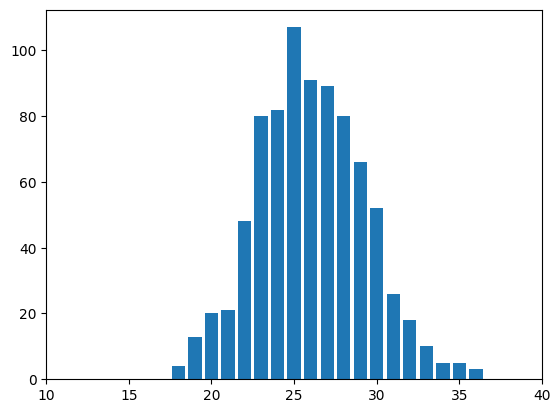


Optimal age for playing tennis is: 25.0



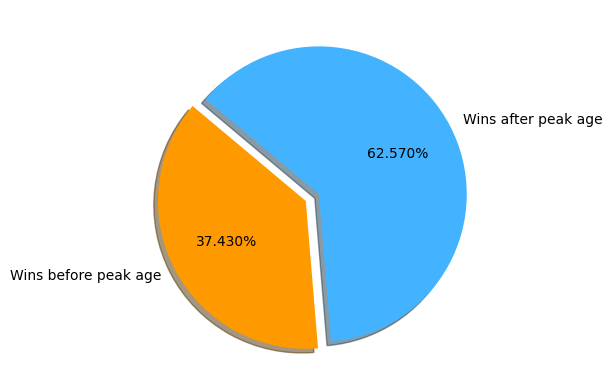

In [ ]:
def get_birth_year(player):
  return atpplayers[atpplayers['full_name'] == player]['birth_year']

data = []
all_players = []
for i in range(len(atp_matches)):
  current_year = 2000 + i
  wins = {}
  current_data = atp_matches[i]

  for j in range(current_data.shape[0]):
    wins[current_data.loc[j, 'Winner']] = wins.get(current_data.loc[j, 'Winner'], 0) + 1

  data.append(wins)
  all_players.extend(list(wins.keys()))

all_players = list(set(all_players))
total_wins = []
for i in range(len(all_players)):
  total_wins.append([])

for i in range(len(all_players)):
  for j in range(len(data)):
    total_wins[i].append(data[j].get(all_players[i], 0))

data_to_plot = []

for i in range(len(all_players)):
  if (get_birth_year(all_players[i]).shape[0] != 1):
    continue

  initial_age = 2000 - get_birth_year(all_players[i])

  data_to_plot.append(np.argmax(total_wins[i]) + initial_age)

data_to_plot = np.array(data_to_plot).squeeze()

mp = {}

for i in data_to_plot:
  mp[i] = mp.get(i, 0) + 1

plt.xlim(10, 40)
plt.bar(mp.keys(), mp.values())
plt.show()

opt_age = max(zip(mp.keys(), mp.values()), key=lambda x: x[1])[0]
print()
print("Optimal age for playing tennis is:", opt_age)
print()

wins_before_max = wins_after_max = 0

for i, j in mp.items():
  if i < opt_age:
    wins_before_max += j
  elif i > opt_age:
    wins_after_max += j

colors = ['#ff9900', '#44b3ff']
explode = (0.1, 0)
plt.pie([wins_before_max, wins_after_max], labels=['Wins before peak age', 'Wins after peak age'], autopct='%.3f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.show()

## Question 3

Is there any Correlation between the number of sets played and the difference in the player ranks?

**Inference:**

The correlation between the number of sets played and the difference in the player ranks comes out to be arround -2% which shows that there is very little correlation between the performance of the player in that match and their rank. but it is still negatively correlated, that is if the rank difference is less then the match goes on for more number of sets.

In [ ]:
def CalculateMeanAndVariance(data):
  return data.mean(), data.var()

x = []
y = []
for i in range(all_data.shape[0]):
  if all_data.loc[i, 'WRank'] == 'NR' or all_data.loc[i, 'LRank'] == 'NR' or np.isnan(all_data.loc[i, 'WRank']) or np.isnan(all_data.loc[i, 'LRank']) or np.isnan(all_data.loc[i, 'Wsets']) or np.isnan(all_data.loc[i, 'Lsets']):
    continue

  x.append(abs(all_data.loc[i, 'WRank'] - all_data.loc[i, 'LRank']))
  y.append(all_data.loc[i, 'Wsets'] + all_data.loc[i, 'Lsets'])

x = np.array(x)
y = np.array(y)

ex, varx = CalculateMeanAndVariance(x)
ey, vary = CalculateMeanAndVariance(y)
covar = np.mean((x - ex) * (y - ey))
corr = covar / math.sqrt(varx * vary)
print('Correlation between the rank difference and the number of sets played is:', corr * 100, '%')

Correlation between the rank difference and the number of sets played is: -2.139377966406707 %


## Question 4

Is there a relation between the type of surface and the time of the year. As in are some surfaces more prefered over other surfaces in a particular season.

**Inference**

From the plots, you can see that the type of court that is used is highly dependent on the season.
* Hard surface courts are mainly used from Jan to Mar and from July to Nov.
* Clay surface is mainly used from Feb to July.
* Grass surface is highly seasonal and used only in June and July.
* Carpet surface is also highly seasonal and is used only from Oct to Feb

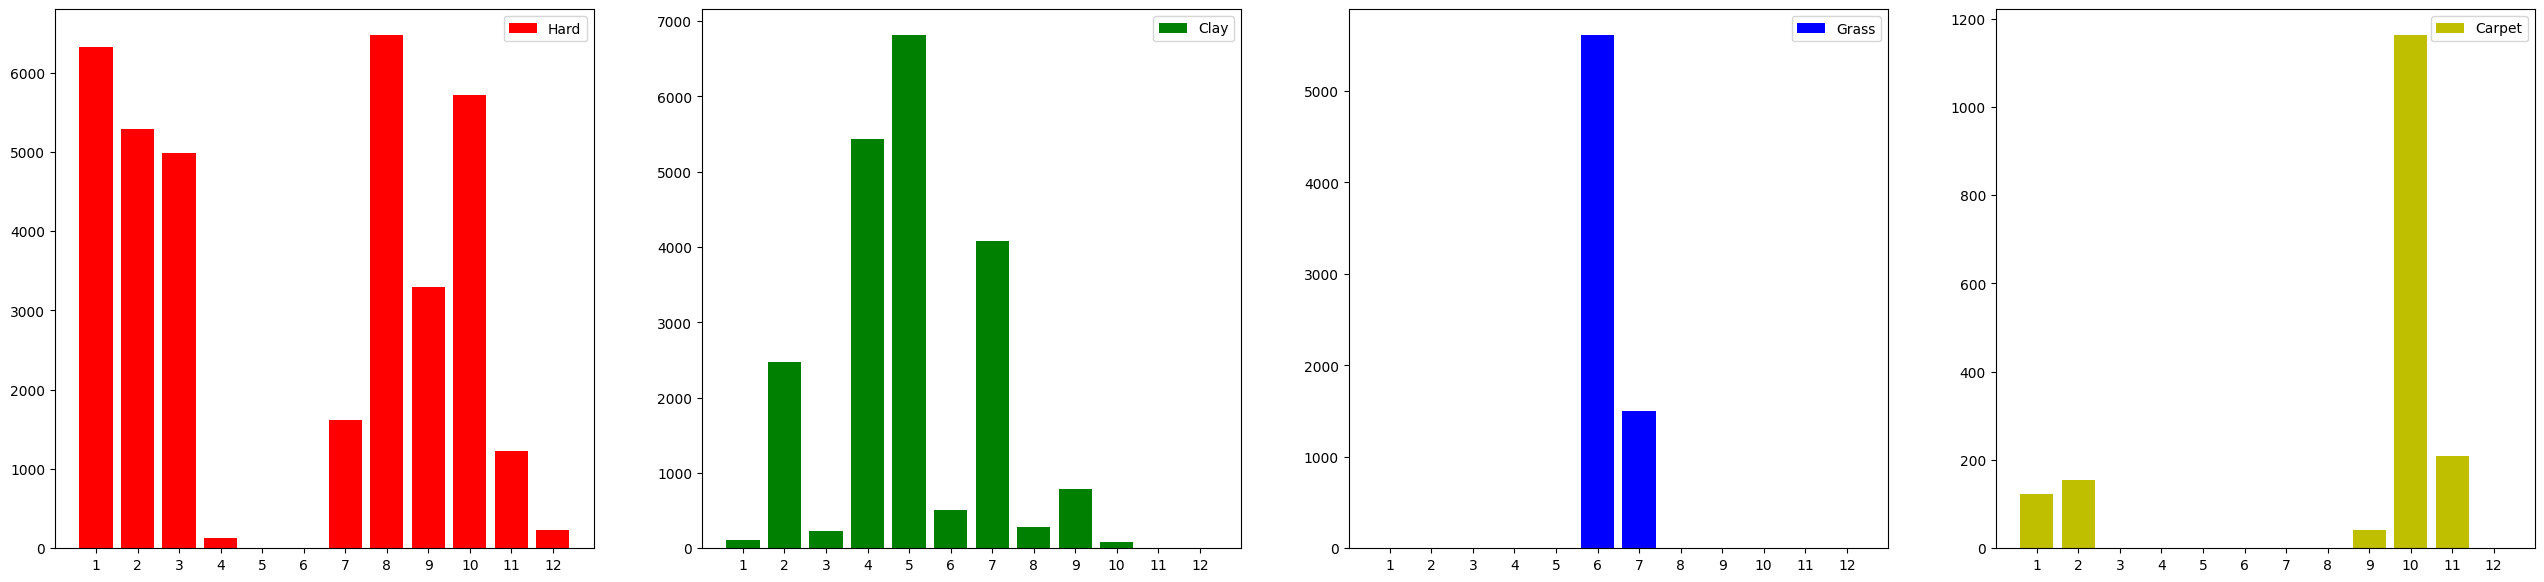

In [ ]:
surfaces = list(all_data['Surface'].unique())
all_data['Month'] = all_data['Date'].dt.month
data_to_plot = np.zeros((4, 12))
final_data = all_data[['Surface', 'Month', 'Date']].groupby(['Surface', 'Month']).count()

for _, group in final_data.items():
  for name, value in group.items():
    data_to_plot[surfaces.index(name[0]), name[1] - 1] += value

plt.figure(figsize=(4 * 8, 7))
color = 'rgby'
for i in range(len(surfaces)):
  plt.subplot(1, 4, i + 1)
  plt.bar(np.arange(1, 13, 1).astype(str), data_to_plot[i, :], label=surfaces[i], color=color[i])
  plt.legend()
plt.show()

## Question 5

Is there any correlation between the weight and the rank of the players. As in do lighter players have advantages over heavier players?

**Inference**

From the graph we can see that there is not a completely true, there are a few lighter players who don't perform well, but in general the graph is a bit skewed towards the lower weight people

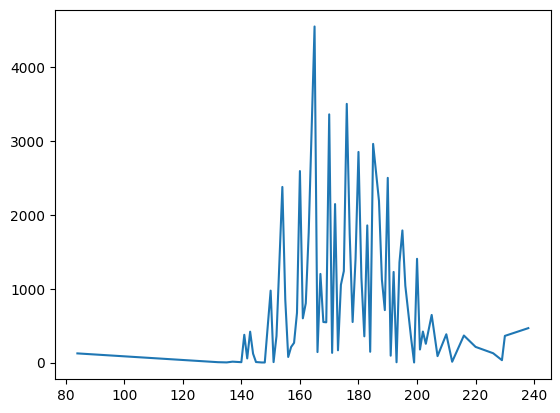


The maximum wins are of the players whose weight in pounds is: 165.0 lbs


In [ ]:
mp = {}
for i in range(joined.shape[0]):
  weight = joined.loc[i, 'weight_lbs']
  if np.isnan(weight) or weight == 0:
    continue
  mp[weight] = mp.get(weight, 0) + 1

data_to_plot = [(i, j) for i, j in mp.items()]
data_to_plot.sort()
plt.plot([i[0] for i in data_to_plot], [i[1] for i in data_to_plot])
plt.show()
print()
print('The maximum wins are of the players whose weight in pounds is:', max(data_to_plot, key=lambda x: x[1])[0], 'lbs')

## Question 6

Is there any relation between winning the first set and winning the entire match?

**Interpretion:**

Based on the results, around 80% of the people who win the first set win the entire match. So winning the first set is crucial.

In [ ]:
cnt = 0
total = 0
for i in range(len(atp_matches)):
  current_year = atp_matches[i]

  cnt += current_year[current_year['W1'] > current_year['L1']].shape[0]
  total += current_year.shape[0]

print("Correlation between winning the first set and winning the entire match:", cnt / total * 100, '%')

Correlation between winning the first set and winning the entire match: 80.15585775669557 %


## Question 7
Top 5 Emerging players, players who have the most wins against higher ranked people. Also plot the number of people who have defeated a higher ranked player.

**Inferences**

There are a compariable number of instances where a lower ranked person performs better than a higher ranked person.

,Name,Wins against more ranked player
0,Lopez F.,162
1,Wawrinka S.,146
2,Youzhny M.,140
3,Karlovic I.,134
4,Monfils G.,133


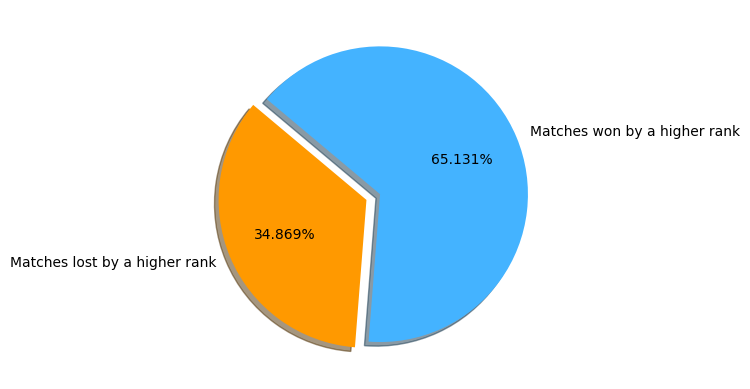

In [ ]:
mp = {}
total = 0
for i in range(len(atp_matches)):
  current_year = atp_matches[i]
  current_year = current_year[(current_year['WRank'] != 'NR') & (current_year['LRank'] != 'NR')]
  total += current_year.shape[0]
  data = current_year[current_year['WRank'] > current_year['LRank']].groupby('Winner').size()
  for group, value in data.items():
    mp[group] = mp.get(group, 0) + value

final = list(mp.items())
final.sort(key=lambda x: -x[1])
display(pd.DataFrame(final).rename(columns={0: 'Name', 1: 'Wins against more ranked player'}).head(5))

total_dissapointments = sum([i[1] for i in final])
colors = ['#ff9900', '#44b3ff']
explode = (0.1, 0)
plt.pie([total_dissapointments, total - total_dissapointments], labels=['Matches lost by a higher rank', 'Matches won by a higher rank'], autopct='%.3f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.show()

## Question 8

Find the pair of players that have faced off the maximum number of times and what are their win percentatages.

**Inference**

The maximum number of faceoffs are between Nadal and Djokovic, and both of them have a win percentages of around 48% and 52% respectively.

Maximum faceoffs are between Nadal R. and Djokovic N.


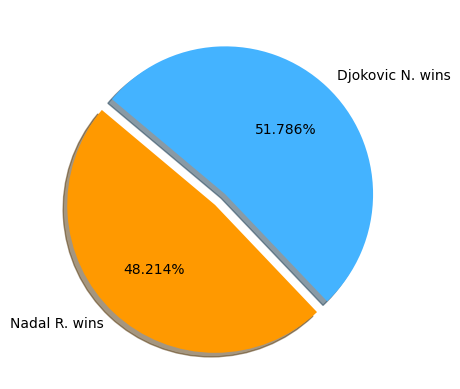

In [ ]:
mp = {}

for i in range(all_data.shape[0]):
  mp[(all_data.loc[i, 'Winner'], all_data.loc[i, 'Loser'])] = mp.get((all_data.loc[i, 'Winner'], all_data.loc[i, 'Loser']), 0) + 1
  mp[(all_data.loc[i, 'Loser'], all_data.loc[i, 'Winner'])] = mp.get((all_data.loc[i, 'Loser'], all_data.loc[i, 'Winner']), 0) + 1

arr = list(mp.items())
arr.sort(key=lambda x: -x[1])
ans = arr[0][0]
a_win = b_win = 0

for i in range(all_data.shape[0]):
  if all_data.loc[i, 'Winner'] == ans[0] and all_data.loc[i, 'Loser'] == ans[1]:
    a_win += 1
  elif all_data.loc[i, 'Loser'] == ans[0] and all_data.loc[i, 'Winner'] == ans[1]:
    b_win += 1

print(f'Maximum faceoffs are between {ans[0]} and {ans[1]}')

colors = ['#ff9900', '#44b3ff']
explode = (0.1, 0)
plt.pie([a_win, b_win], labels=[f'{ans[0]} wins', f'{ans[1]} wins'], autopct='%.3f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.show()

## Question 9

Which player won most of the tournaments in a given year and in which year?

**Inference**

Maximum number of tournament wins was by Federer R. in the year 2006. He had 12 wins in that year.

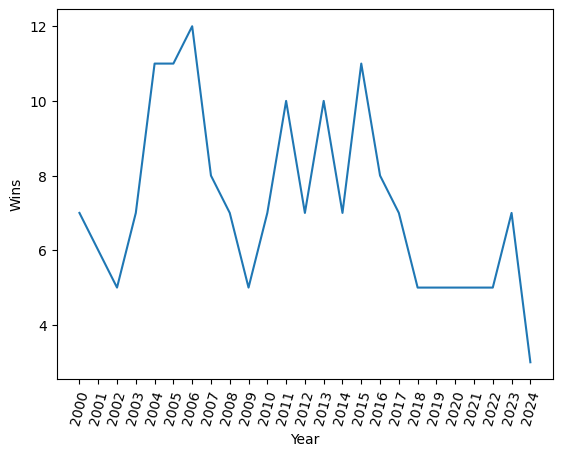


Maximum number of tournament wins was by Federer R. in the year 2006. He had 12 wins in that year.


In [ ]:
data_to_plot = []
for i in range(len(atp_matches)):
  current_data = atp_matches[i]

  data_to_plot.append(current_data[current_data['Round'] == 'The Final'].groupby('Winner')['Tournament'].count().sort_values(ascending=False)[0])

plt.plot(np.arange(2000, 2025).astype(str), data_to_plot)
plt.xticks(rotation=75)
plt.xlabel("Year")
plt.ylabel('Wins')
plt.show()

player = atp_matches[np.argmax(data_to_plot)][atp_matches[np.argmax(data_to_plot)]['Round'] == 'The Final'].groupby('Winner')['Tournament'].count().sort_values(ascending=False).keys()[0]

print(f"\nMaximum number of tournament wins was by {player} in the year {2000 + np.argmax(data_to_plot)}. He had {max(data_to_plot)} wins in that year.")

## Question 10

What odds should we bet on if we want to maximise our chances of winning. In other words, which odds are the most reliable to bet on and have the most correlation with the wins.

**Inference**

Almost all the winning odds come out to be almost same and lie in the range from 39% to 40%. But if we want to blindly pick out the maximum, then Bet365 have the best odds of guessing the winner among the others.

In [ ]:
# across all games, this is the probability of winning given by Bet365
all_data['winning_odds_b365'] = np.zeros(all_data.shape[0])
all_data['winning_odds_ex'] = np.zeros(all_data.shape[0])
all_data['winning_odds_lb'] = np.zeros(all_data.shape[0])
all_data['winning_odds_ps'] = np.zeros(all_data.shape[0])

for i in range(all_data.shape[0]):
  all_data.loc[i, 'winning_odds_b365'] = all_data.loc[i, 'B365W'] / (all_data.loc[i, 'B365W'] + all_data.loc[i, 'B365L'])
  if not (isinstance(all_data.loc[i, 'EXW'], str) or isinstance(all_data.loc[i, 'EXL'], str)):
    all_data.loc[i, 'winning_odds_ex'] = all_data.loc[i, 'EXW'] / (all_data.loc[i, 'EXW'] + all_data.loc[i, 'EXL'])
  all_data.loc[i, 'winning_odds_lb'] = all_data.loc[i, 'LBW'] / (all_data.loc[i, 'LBW'] + all_data.loc[i, 'LBL'])
  all_data.loc[i, 'winning_odds_ps'] = all_data.loc[i, 'PSW'] / (all_data.loc[i, 'PSW'] + all_data.loc[i, 'PSL'])

print(f'Probability of winning a bet if we follow Bet365 odds are:', all_data['winning_odds_b365'].mean() * 100, '%')
print(f'Probability of winning a bet if we follow Expekt odds are:', all_data['winning_odds_ex'].mean() * 100, '%')
print(f'Probability of winning a bet if we follow Ladbrokes odds are:', all_data['winning_odds_lb'].mean() * 100, '%')
print(f'Probability of winning a bet if we follow Pinnacles Sports odds are:', all_data['winning_odds_ps'].mean() * 100, '%')

Probability of winning a bet if we follow Bet365 odds are: 39.72865498097431 %
Probability of winning a bet if we follow Expekt odds are: 39.65413610301806 %
Probability of winning a bet if we follow Ladbrokes odds are: 39.304333780057796 %
Probability of winning a bet if we follow Pinnacles Sports odds are: 39.317606495972925 %
